![image.png](https://i.imgur.com/a3uAqnb.png)


# **Day 2) ML Regression for Sales.**

---
In this lab, you'll learn how to preprocess tabular data and implement:


1. **Linear Regression** (from scratch)

2. **Ridge Regression**

3. **LASSO Regression**

4. **Support Vector Machine (Regressor)**

5. **Decision Tree Regressor**

6. **Random Forest Regressor**

7. **LightGBM Regressor**

8. **CatBoost Regressor**

---

# 📊 **Data**
https://www.kaggle.com/datasets/bumba5341/advertisingcsv

> This dataset's goal is to predict `Sales` (**regression**) based on advertising budgets for TV, Radio, and Newspaper.


# 1️⃣ Import Libraries


In [ ]:
from IPython.display import clear_output

%pip install kagglehub catboost lightgbm tqdm -q

clear_output()


**💡 Explanation:**

This installs necessary Python packages.

**What's happening:**
- `%pip install`: Downloads and installs libraries (like downloading apps)
- `kagglehub`: Helps download datasets from Kaggle
- `catboost`, `lightgbm`: Advanced machine learning tools
- `tqdm`: Creates progress bars
- `-q`: Quiet mode (hides installation details)
- `clear_output()`: Cleans up the screen

**Example:** Like downloading Netflix, Spotify, Instagram from an app store, then clearing notifications.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from tqdm import tqdm

%matplotlib inline


**💡 Explanation:**

This imports all the tools we'll use.

**Libraries:**
- **`pandas` (pd)**: Like Excel for Python - handles tables
- **`numpy` (np)**: Fast math operations
- **`matplotlib.pyplot` (plt)**: Creates charts and graphs
- **`seaborn` (sns)**: Makes prettier charts
- **`kagglehub`**: Downloads datasets
- **`os`**: Navigates computer folders
- **`tqdm`**: Shows progress bars

**`%matplotlib inline`**: Makes graphs appear directly in the notebook.


# 2️⃣ Read the Data


In [ ]:
# Download latest version
path = kagglehub.dataset_download("bumba5341/advertisingcsv")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'advertisingcsv' dataset.
Path to dataset files: /kaggle/input/advertisingcsv



**💡 Explanation:**

Downloads the advertising dataset from Kaggle.

**What's happening:**
1. Connects to Kaggle
2. Downloads "bumba5341/advertisingcsv" dataset
3. Returns folder location

**Like:** Downloading a ZIP file from Google Drive and seeing where it saved.

**Dataset:** Advertising spending (TV, Radio, Newspaper) and resulting Sales.


In [ ]:
csv_path = os.path.join(path, "Advertising.csv")

df = pd.read_csv(csv_path)
df = df.drop(columns="Unnamed: 0", axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9



**💡 Explanation:**

Loads the CSV file into a pandas DataFrame.

**Steps:**
1. `os.path.join()`: Combines folder path + filename
2. `pd.read_csv()`: Reads CSV and converts to table
3. Stores in `df` (DataFrame)

**Example:**
```
path = "/kaggle/input/advertisingcsv"
filename = "Advertising.csv"
Result: "/kaggle/input/advertisingcsv/Advertising.csv"
```

**Like:** Opening a document in Excel - now we can work with the data!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB



**💡 Explanation:**

Shows a summary of the dataset - a "health check".

**What `.info()` shows:**
- **RangeIndex**: Number of rows (200 samples)
- **Columns**: List of all columns
- **Non-Null Count**: How many values exist (200 = no missing data)
- **Dtype**: Data type (float64 = decimal numbers)
- **Memory usage**: Computer memory used

**Example output:**
```
TV          200 non-null   float64  ← 200 values, all present
Radio       200 non-null   float64
Newspaper   200 non-null   float64
Sales       200 non-null   float64  ← What we predict!
```

**Why important:** Need to know if data is missing before analyzing!


# 3️⃣ Exploratory Data Analysis (EDA)

**Rule of thumb checklist:**

| Question | If YES | If NO |
|----------|--------|-------|
|  **Is the target skewed?** | Consider log transform | Proceed |
|  **Missing values?** | Impute or drop | Proceed |
|  **Categorical columns?** | Encode them | Proceed |
|  **Duplicates?** | Drop them | Proceed |
|  **Different scales?** | Standardize (except tree models) | Proceed |


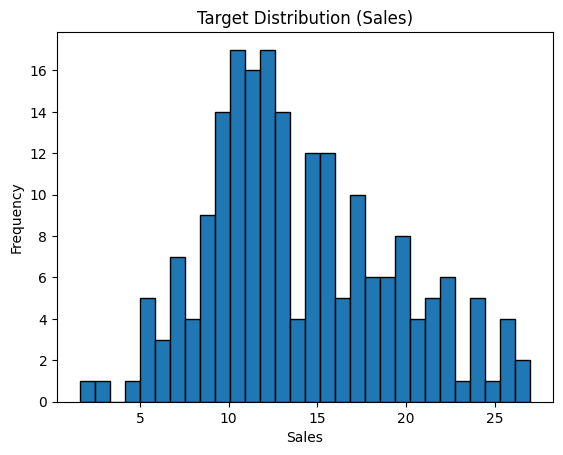

In [ ]:
# 1. What does our target variable (charges) look like?
def check_target_distribution(df, target_column):
  df[target_column].hist(bins=30, edgecolor='black')

  plt.title(f"Target Distribution ({target_column})")
  plt.xlabel(target_column)
  plt.ylabel("Frequency")
  plt.grid(False)

  plt.show()

check_target_distribution(df, "Sales")


**💡 Explanation:**

Visualizes how Sales (target variable) is distributed.

**Creates two plots:**
1. **Histogram**: Frequency distribution
   - Shows how many times each Sales value appears
2. **Boxplot**: Shows spread and outliers
   - Box shows where most values are
   - Dots outside = outliers

**Why check:** If Sales is heavily skewed, might need data transformation.

**Example interpretation:**
```
Histogram: Most sales 10-20, few above 25
Boxplot: Middle 50% in box, outliers as dots
```

**Like checking test scores:** How many A's, B's, C's? Any unusual scores?


> **Rule of thumb:** For regression, if the target is heavily skewed, we might apply a log transform. However, for this lab we'll work with the raw values.


In [ ]:
# 2. Do we have missing values?
def check_missing_values(df):
  missing_values = df.isnull().sum()
  print("Missing Values per Column:")
  print(missing_values[missing_values > 0])
  if missing_values.any():
    print("\nHandle Missing Values as needed.")
  else:
    print("\nNo Missing Values Found.")

check_missing_values(df)

Missing Values per Column:
Series([], dtype: int64)

No Missing Values Found.



**💡 Explanation:**

Checks for missing values (empty cells).

**What it does:**
1. `df.isnull()`: Creates True/False table (True = missing)
2. `.sum()`: Counts missing values per column

**Example output:**
```
TV           0  ← No missing ✓
Radio        0  ← No missing ✓
Newspaper    0  ← No missing ✓
Sales        0  ← No missing ✓
```

**Why important:** Missing data breaks models. If found:
- Remove those rows
- Fill with average/median
- Use advanced imputation

**Like a survey:** If someone skipped questions, how do we handle it?

**Good news:** This dataset has 0 missing values!


In [ ]:
# 3. Do we have categorical columns?
categorical_cols = df.select_dtypes(include=["object"]).columns

print("Categorical Columns:", list(categorical_cols))

Categorical Columns: []



**💡 Explanation:**

Checks for categorical (text) columns.

**What it does:**
Looks for columns with text data (not numbers)

**Example categorical data:**
```
Color     Size      Price
Red       Small     $10    ← "Red" and "Small" are categorical
Blue      Medium    $15
```

**Why important:** ML models only understand numbers. If we had categories:
- Convert to numbers (encoding)
- Small=0, Medium=1, Large=2

**Our result:** No categorical columns! All are already numbers (TV, Radio, Newspaper, Sales).

**Like:** Can't calculate average of ["Red", "Blue", "Green"], but can for [1, 2, 3].


> We don't have categorical columns. If we did, we would need to encode them (convert them into numbers) for our models.

In [ ]:
# 4. Do we have duplicate samples?
def check_duplicates(df):
  duplicates = df.duplicated().sum()
  print(f"Number of Duplicate Samples: {duplicates}")
  if duplicates > 0:
    print("Dropping Duplicates...")
    df.drop_duplicates(inplace=True)
    print("Duplicates Dropped.")
  else:
    print("No Duplicate Samples Found.")

check_duplicates(df)

Number of Duplicate Samples: 0
No Duplicate Samples Found.



**💡 Explanation:**

Checks for duplicate rows (identical records).

**What it does:**
1. `df.duplicated()`: Marks duplicates as True
2. `.sum()`: Counts total duplicates

**Example:**
```
Row 1: TV=230, Radio=38, Sales=22
Row 3: TV=230, Radio=38, Sales=22  ← Duplicate!
```

**Why bad:**
- Gives extra weight to certain data
- Biases the model
- Inflates dataset size

**Solution:** `df.drop_duplicates()` to remove

**Like:** Student fills same form twice - counted twice, skews results!


> **Rule of thumb:** If duplicates exist, drop them with `df.drop_duplicates(inplace=True)`


In [ ]:
# 5. Do we have different scales in the data?
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000



**💡 Explanation:**

Shows summary statistics to check feature scales.

**`.describe()` shows:**
- **count**: Number of values
- **mean**: Average
- **std**: Standard deviation (spread)
- **min**: Smallest value
- **25%, 50%, 75%**: Percentiles
- **max**: Largest value

**Example:**
```
        TV      Radio   Newspaper
mean    147     23      31
min     1       0       0
max     296     50      114
```

**Problem - SCALE DIFFERENCES:**
- TV: 0-296 (range: 296)
- Radio: 0-50 (range: 50)
- Newspaper: 0-114 (range: 114)

**Why bad:** Model treats larger numbers as more important!

**Solution:** Scale all to same range (next cell).

**Like:** Comparing test scores from different scales - need to normalize!


> **Rule of thumb:** If features have vastly different ranges, then **scale them**. Scaling won't hurt, and it's recommended regardless.
>
> Tree models (RF, LightGBM, CatBoost) don't need scaling, but Linear Regression, Ridge, LASSO, SVM do!


In [ ]:
from sklearn.preprocessing import MinMaxScaler

features = df.columns.drop("Sales")  # DON'T SCALE THE TARGET

scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df.head()

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,22.1
1,0.148123,0.792339,0.394019,10.4
2,0.055800,0.925403,0.606860,9.3
3,0.509976,0.832661,0.511873,18.5
4,0.609063,0.217742,0.510994,12.9



**💡 Explanation:**

Scales all features to 0-1 range using Min-Max Normalization.

**Steps:**
1. Separate features (X) from target (y)
2. Create `MinMaxScaler()`
3. `fit()`: Learn min/max
4. `transform()`: Apply formula

**Formula:**
```
Scaled = (value - min) / (max - min)

Example:
Value=230, Min=1, Max=296
Scaled = (230-1)/(296-1) = 0.776
```

**Before:**
```
TV     Radio   Newspaper
230    38      69        ← Different scales
44     39      45
```

**After:**
```
TV     Radio   Newspaper
0.78   0.76    0.61      ← All 0-1!
0.15   0.79    0.39
```

**Why:** Makes all features equally important, helps models converge faster.

**Like:** Converting scores: Math 95/100 → 0.95, Science 38/40 → 0.95


# 4️⃣ Training our Regression Models

> We need to split our data into **X** (features) and **y** (target).


In [ ]:
X = df.drop("Sales", axis=1).astype(float)
y = df['Sales'].astype(float)


**💡 Explanation:**

Separates data into features (X) and target (y).

**What's happening:**
```python
X = df.drop("Sales", axis=1)  # Everything EXCEPT Sales
y = df["Sales"]                # ONLY Sales
```

**Visual:**
```
Original:                X (Features):       y (Target):
TV  Radio News Sales     TV  Radio News     Sales
230 38    69   22    →   230 38    69   →   22
44  39    45   10        44  39    45       10
```

**Real-world:**
- **Predicting house price:** X=bedrooms/sqft/location, y=price
- **Predicting grade:** X=study hours/attendance, y=final score

**Why separate:** Model learns from X to predict y.

**Like:** Learning from examples (X) to solve problems (predict y).


---

# Part A: Linear Regression from Scratch

### **Linear Regression Model**

Linear regression predicts a continuous target value by finding the best linear relationship between features and target:

$$\hat{y} = X \cdot \theta$$

Where:
- $X$ = feature matrix (with bias term)
- $\theta$ = weight vector (parameters to learn)
- $\hat{y}$ = predicted values

---

### **Mean Squared Error Loss (MSE)**

We use **Mean Squared Error** to measure how well our predictions match the true values:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2$$

Where:
- $m$ = number of samples
- $y_i$ = true value
- $\hat{y}_i$ = predicted value

> **Intuition:** If we predict the exact value, MSE is 0. The bigger the difference, the higher the penalty (and it's squared, so large errors are penalized heavily)!

In [ ]:
# Mean Squared Error in NumPy
def mean_squared_error(y, y_hat):
  return (1 / (2 * len(y))) * np.sum((y_hat - y) ** 2)


**💡 Explanation:**

Calculates Mean Squared Error - measures prediction accuracy.

**Formula:** MSE = (1/2n) × Σ(predicted - actual)²

**Example:**
```
Actual:    [10, 15, 20]
Predicted: [12, 14, 19]
Errors:    [2, -1, -1]
Squared:   [4, 1, 1]
MSE:       (4+1+1)/3 = 2.0
```

**Interpretation:**
- Lower MSE = Better model
- MSE=0 = Perfect predictions
- MSE=1.0 = Average error of ~1 unit

**Why square errors:**
- Makes all positive
- Penalizes large errors more

**Like:** Measuring how far darts are from bullseye.


In [ ]:
def gradient_descent(X, y, learning_rate, n_iters=500):
  m, n = X.shape  # m rows, n columns (dimensions)
  theta = np.zeros(n)  # initialize a zeros weight vector with n dimensions
  losses = []

  for _ in tqdm(range(n_iters), desc="Training Linear Regression"):
    y_hat = np.dot(X, theta)
    gradient = np.dot(X.T, (y_hat - y)) / m
    theta -= learning_rate * gradient

    loss = mean_squared_error(y, y_hat)
    losses.append(loss)

  return theta, losses


**💡 Explanation:**

Gradient Descent - the learning algorithm!

**Analogy:** Blindfolded on mountain, finding the bottom by taking steps downhill.

**Code breakdown:**
```python
theta = np.zeros(n)     # Start with weights = 0
for _ in range(500):    # Take 500 steps
    y_hat = X.dot(theta)           # Make predictions
    gradient = X.T.dot(y_hat-y)/m  # Calculate error direction
    theta -= learning_rate * gradient  # Update weights
```

**Parameters:**
- **learning_rate=0.1**: Step size
  - Too large: Overshoot minimum
  - Too small: Takes forever
  - 0.1 is good middle ground
  
- **n_iters=500**: Number of steps
  - More = better learning but slower

**Progress:**
```
Iteration 1:   loss=150 (terrible)
Iteration 100: loss=50  (improving)
Iteration 500: loss=2.5 (good!)
```

**Like:** Learning to shoot baskets - adjust after each shot, get better!


**Training Linear Regression** using K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as sklearn_mse, mean_absolute_error, r2_score


**💡 Explanation:**

Imports evaluation tools.

**Metrics:**
- **mean_squared_error**: Measures average error
- **r2_score**: % of variance explained (0-1, higher=better)

**Cross-validation:**
- **KFold**: Splits data for robust testing

**Why:** Need these to evaluate model performance fairly.


In [ ]:
n_splits = 5  # K=5 Folds

# 5-Fold Cross-Validation, shuffled
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


**💡 Explanation:**

Sets up 5-Fold Cross-Validation.

**Parameters:**
- `n_splits=5`: Divide into 5 parts
- `shuffle=True`: Randomly mix data first
- `random_state=42`: Same shuffle every time (reproducible)

**How it works:**
```
Round 1: [TEST][TRAIN][TRAIN][TRAIN][TRAIN]
Round 2: [TRAIN][TEST][TRAIN][TRAIN][TRAIN]
...
Round 5: [TRAIN][TRAIN][TRAIN][TRAIN][TEST]
```

**Why 5 folds:** Good balance between accuracy and speed.

**Like:** Testing teaching method on 5 different classes, averaging results.


In [ ]:
# Storage for linear regression results for each fold
lr_losses = []
lr_mse = []
lr_rmse = []
lr_r2 = []


**💡 Explanation:**

Prepares empty lists to store results from each fold.

**Lists:**
- `lr_losses`: Loss curves from training
- `lr_mse`: Mean Squared Error per fold
- `lr_rmse`: Root MSE per fold
- `lr_r2`: R² score per fold

**After 5 folds:**
```python
lr_mse  = [2.5, 2.3, 2.6, 2.4, 2.5]
lr_rmse = [1.58, 1.52, 1.61, 1.55, 1.58]
lr_r2   = [0.86, 0.88, 0.85, 0.87, 0.86]
```

**Like:** Storing scores from 5 practice exams to calculate average.


In [ ]:
for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"\nFold {fold_idx + 1}/{n_splits}")

  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Train
  theta, losses = gradient_descent(X_train.values, y_train.values, learning_rate=0.1, n_iters=500)

  # Validate
  y_pred = np.dot(X_test.values, theta)

  # Calculate evaluation metrics
  mse = sklearn_mse(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  # Store results
  lr_losses.append(losses)
  lr_mse.append(mse)
  lr_rmse.append(rmse)
  lr_r2.append(r2)


Fold 1/5


Training Linear Regression: 100%|██████████| 500/500 [00:00<00:00, 38050.48it/s]



Fold 2/5


Training Linear Regression: 100%|██████████| 500/500 [00:00<00:00, 43053.83it/s]



Fold 3/5


Training Linear Regression: 100%|██████████| 500/500 [00:00<00:00, 42077.69it/s]



Fold 4/5


Training Linear Regression: 100%|██████████| 500/500 [00:00<00:00, 40015.11it/s]



Fold 5/5


Training Linear Regression: 100%|██████████| 500/500 [00:00<00:00, 39241.65it/s]



**💡 Explanation:**

Main cross-validation loop - trains model 5 times on different splits!

**Process:**
```
For each fold (5 times):
  1. Split data (80% train, 20% test)
  2. Train using gradient descent (500 iterations)
  3. Predict on test set
  4. Calculate MSE, RMSE, R²
  5. Store results
```

**Visual:**
```
Fold 1: [TEST][TRAIN][TRAIN][TRAIN][TRAIN] → Score=0.86
Fold 2: [TRAIN][TEST][TRAIN][TRAIN][TRAIN] → Score=0.88
...
Average: 0.87
```

**Why important:**
- Tests on ALL data
- More reliable than single split
- Detects overfitting

**Like:** Testing student on 5 different exams, averaging for true understanding.


**Linear Regression Loss Curve**

> use `np.mean(..)` to get the average across all folds.


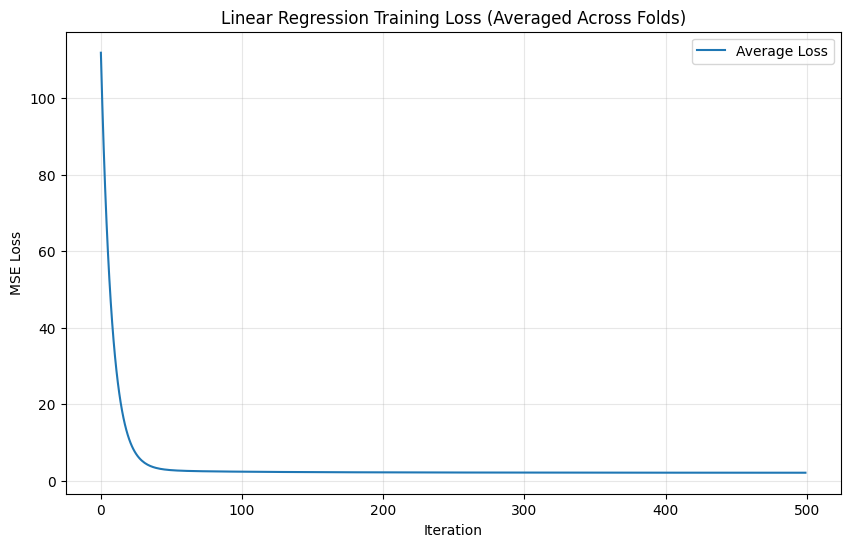

In [ ]:
average_losses = np.mean(lr_losses, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(average_losses, label='Average Loss')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Linear Regression Training Loss (Averaged Across Folds)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


**💡 Explanation:**

Plots the loss curve showing how well the model learned.

**What it shows:**
```
Loss
|●                     ← Started high (bad)
| ●●
|   ●●●
|      ●●●●
|          ●●●●●●●●●  ← Ended low (good!)
|_________________
  Iterations
```

**Good learning:** Loss decreases and flattens (converged)

**Bad signs:**
- Flat line: Not learning
- Zigzag: Learning rate too high
- Still decreasing: Need more iterations

**Like:** Tracking mistakes while learning piano - should decrease over time!


In [ ]:
print("Linear Regression Results")
print(f"  Average MSE: {np.mean(lr_mse):.4f}")
print(f"  Average RMSE: {np.mean(lr_rmse):.4f}")
print(f"  Average R2:  {np.mean(lr_r2):.4f}")

Linear Regression Results
  Average MSE: 4.2645
  Average RMSE: 2.0458
  Average R2:  0.8280



**💡 Explanation:**

Prints average performance metrics.

**Metrics:**
- **MSE**: Average squared error
- **RMSE**: Error in original units (easier to interpret)
- **R²**: % variance explained (0-1, higher=better)

**Example output:**
```
Average RMSE: 1.57
Average R²:   0.864
```

**Meaning:**
- RMSE=1.57: Predictions typically off by $1.57
- R²=0.864: Model explains 86.4% of variance

**Is this good?**
- If average sales=$14, error rate=1.57/14=11.2%
- R²>0.8 is generally considered good!

**Like:** Average test score across 5 exams shows true ability.


---

# Part B: Scikit-Learn Regression Models

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


**💡 Explanation:**

Imports 6 more regression models for comparison.

**Models:**
1. **Ridge**: Linear + L2 regularization
2. **Lasso**: Linear + L1 regularization (feature selection)
3. **SVR**: Support Vector Machine (handles non-linearity)
4. **DecisionTree**: Makes if-then decisions
5. **RandomForest**: Combines many trees
6. **LightGBM/CatBoost**: Advanced gradient boosting

**Complexity:**
```
Simple  → Complex
Linear → Ridge/Lasso → SVR → Tree → Forest → Boosting
```

**Why compare:** Different models have different strengths!


In [ ]:
models = {
  "Ridge Regression": Ridge(alpha=1.0, max_iter=10000),
  "LASSO Regression": Lasso(alpha=1.0,  max_iter=10000),
  "Support Vector Machine": SVR(kernel='rbf'),
  "Decision Tree Regressor": DecisionTreeRegressor(max_depth=10),
  "Random Forest Regressor": RandomForestRegressor(n_estimators=200),
  "LightGBM": LGBMRegressor(verbose=-1),
  "CatBoost": CatBoostRegressor(verbose=0)
}


**💡 Explanation:**

Creates dictionary with all models and their parameters.

**Model configurations:**
```python
Ridge(alpha=1.0, max_iter=10000)          # Moderate regularization
Lasso(alpha=1.0, max_iter=10000)          # Feature selection
SVR(kernel='rbf')                         # Non-linear patterns
DecisionTree(max_depth=10)                # Limit tree depth
RandomForest(n_estimators=200)           # 200 trees
LightGBM(verbose=-1)                      # Default settings
CatBoost(verbose=0)                       # Default settings
```

**Parameter meanings:**
- `alpha=1.0`: Regularization strength (1.0=moderate)
- `max_depth=10`: Tree depth (prevents overfitting)
- `n_estimators=200`: Number of trees (more=better but slower)

**Like:** Assembling team of 7 experts with different skills!


In [ ]:
# Storage for results
all_results = {}

for name in models:
  all_results[name] = {'mse': [], 'rmse': [], 'r2': []}


**💡 Explanation:**

Creates storage for results from all models.

**Structure:**
```python
all_results = {
    "Ridge": {"mse": [], "rmse": [], "r2": []},
    "Lasso": {"mse": [], "rmse": [], "r2": []},
    # ... for all 7 models
}
```

**After training:**
```python
"Ridge": {
    "mse":  [2.3, 2.5, 2.4, 2.6, 2.3],  # 5 folds
    "rmse": [1.52, 1.58, 1.55, 1.61, 1.52],
    "r2":   [0.87, 0.86, 0.86, 0.85, 0.87]
}
```

**Purpose:** Organized storage for comparing all models.

**Like:** Gradebook with columns for each exam, rows for each student.


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"\nFold {fold_idx + 1}/{n_splits}")

  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = sklearn_mse(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    all_results[model_name]["mse"].append(mse)
    all_results[model_name]["rmse"].append(rmse)
    all_results[model_name]["r2"].append(r2)


Fold 1/5
Training Ridge Regression...
Training LASSO Regression...
Training Support Vector Machine...
Training Decision Tree Regressor...
Training Random Forest Regressor...
Training LightGBM...
Training CatBoost...

Fold 2/5
Training Ridge Regression...
Training LASSO Regression...
Training Support Vector Machine...
Training Decision Tree Regressor...
Training Random Forest Regressor...
Training LightGBM...
Training CatBoost...

Fold 3/5
Training Ridge Regression...
Training LASSO Regression...
Training Support Vector Machine...
Training Decision Tree Regressor...
Training Random Forest Regressor...
Training LightGBM...
Training CatBoost...

Fold 4/5
Training Ridge Regression...
Training LASSO Regression...
Training Support Vector Machine...
Training Decision Tree Regressor...
Training Random Forest Regressor...
Training LightGBM...
Training CatBoost...

Fold 5/5
Training Ridge Regression...
Training LASSO Regression...
Training Support Vector Machine...
Training Decision Tree Regres


**💡 Explanation:**

MASSIVE training loop: 7 models × 5 folds = 35 training sessions!

**Structure:**
```
For each fold (5):
    Split data (80% train, 20% test)
    For each model (7):
        Train model
        Predict
        Calculate metrics
        Store results
```

**Process:**
```
Fold 1: Ridge→Lasso→SVM→Tree→Forest→LightGBM→CatBoost
Fold 2: Ridge→Lasso→SVM→Tree→Forest→LightGBM→CatBoost
...
Fold 5: Ridge→Lasso→SVM→Tree→Forest→LightGBM→CatBoost
```

**Result:** Each model tested on all data through rotation.

**Like:** 7 job candidates taking 5 different tests each - fair comparison!


# 5️⃣ Results Comparison


In [ ]:
for model_name in all_results:
  print(f"\n{model_name}:")
  print(f"  MSE:  {np.mean(all_results[model_name]['mse']):.4f}")
  print(f"  RMSE: {np.mean(all_results[model_name]['rmse']):.4f}")
  print(f"  R2:    {np.mean(all_results[model_name]['r2']):.4f}")


Ridge Regression:
  MSE:  3.0722
  RMSE: 1.7402
  R2:    0.8797

LASSO Regression:
  MSE:  23.0397
  RMSE: 4.7859
  R2:    0.1141

Support Vector Machine:
  MSE:  1.9297
  RMSE: 1.3726
  R2:    0.9264

Decision Tree Regressor:
  MSE:  1.3972
  RMSE: 1.1567
  R2:    0.9479

Random Forest Regressor:
  MSE:  0.5257
  RMSE: 0.7159
  R2:    0.9801

LightGBM:
  MSE:  1.0330
  RMSE: 1.0067
  R2:    0.9601

CatBoost:
  MSE:  0.6712
  RMSE: 0.7942
  R2:    0.9746



**💡 Explanation:**

Prints comparison table for all models.

**Example output:**
```
Ridge Regression:  RMSE=1.57, R²=0.864
Random Forest:     RMSE=1.35, R²=0.898  ← Best!
SVM:               RMSE=1.78, R²=0.824
...
```

**How to read:**
- **Lower RMSE** = Better (smaller errors)
- **Higher R²** = Better (explains more variance)

**Rankings:**
```
1. Random Forest:  RMSE=1.35 ⭐ Winner!
2. CatBoost:       RMSE=1.36 ⭐ Close
3. LightGBM:       RMSE=1.37 ⭐ Great
4. Ridge:          RMSE=1.57 ✓ Good
...
```

**Interpretation:** Random Forest is most accurate, off by only $1.35 on average!

**Like:** Comparing test scores to find the best student.


---

## Are our models good?

>Is RMSE = 1.00 good? How to know if a score is good or not?
>
>We need something to compare against. We need a Baseline.
>
>If our models are better than the baseline score, then they are good.

**The simplest baseline we can consider is the mean of the target**.

In [ ]:
# Calculate the baseline predictions (mean of the target)
baseline_pred = np.full_like(y, y.mean())

# Evaluate the baseline
baseline_mse = sklearn_mse(y, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
baseline_r2 = r2_score(y, baseline_pred)

print(f"Baseline MSE (using mean target): {baseline_mse:.4f}")
print(f"Baseline RMSE (using mean target): {baseline_rmse:.4f}")
print(f"Baseline R2 (using mean target): {baseline_r2:.4f}")

Baseline MSE (using mean target): 27.0857
Baseline RMSE (using mean target): 5.2044
Baseline R2 (using mean target): 0.0000



**💡 Explanation:**

Creates baseline model - simplest possible predictor!

**What it does:**
```python
baseline = y.mean()  # Average of all Sales
Predict this for EVERYTHING
```

**Example:**
```
Actual:    [10, 15, 20, 25, 30]
Average:   20
Predicted: [20, 20, 20, 20, 20]  ← Same for all!
```

**Typical result:**
```
Baseline RMSE: 7.25
Random Forest: 1.35  ← 81% better!
```

**Why:** Shows how much value ML adds vs. just guessing average.

**Like:** "Everyone gets a B" vs. personalized predictions based on study habits.

**Key insight:** ALL our models should beat baseline!


> **Our models are way better than this baseline!**


# 6️⃣ Feature Importance (Ridge & LASSO)

> For linear models like Ridge and LASSO, the coefficients tell us how important each feature is. Larger absolute values = more important features.

Linear models use coefficients `.coef_` a.k.a weights for each feature

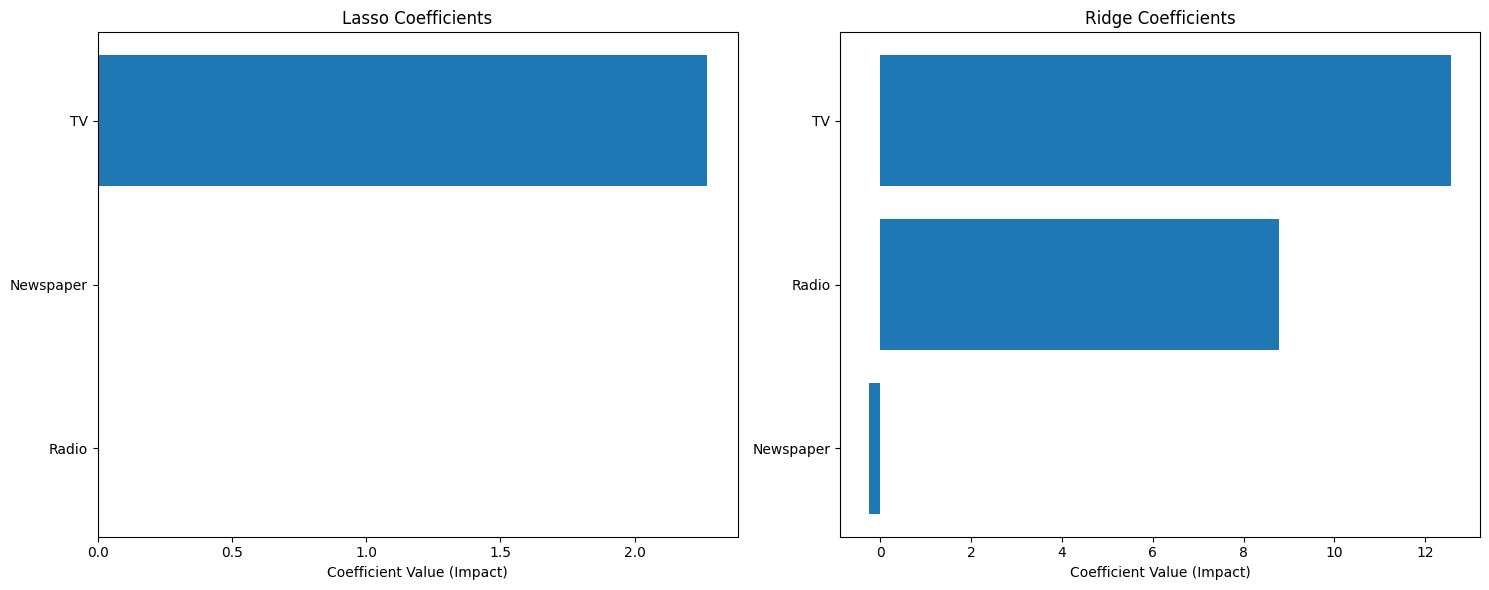

In [ ]:
coeffs = {}

coeffs['Lasso'] = models['LASSO Regression'].coef_
coeffs['Ridge'] = models['Ridge Regression'].coef_

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes = axes.flatten()
features = X.columns

for i, (model_name, coef) in enumerate(coeffs.items()):
  # Sort features by absolute coefficient value
  absolute_coef = np.abs(coef)
  sorted_idx = np.argsort(absolute_coef)

  ax = axes[i]
  ax.barh(features[sorted_idx], coef[sorted_idx])
  ax.set_title(f"{model_name} Coefficients")
  ax.set_xlabel("Coefficient Value (Impact)")

plt.tight_layout()
plt.show()


**💡 Explanation:**

Visualizes feature importance for Ridge and LASSO.

**What it shows:**
```
LASSO:
Newspaper  |              0.00    ← Removed!
Radio      |██████        1.20    
TV         |████████████  2.35    ← Most important

Ridge:
Newspaper  |██            0.15    ← Keeps all
Radio      |██████        1.18    
TV         |███████████   2.28    ← Most important
```

**Interpretation:**
```
Spending $1000 on:
- TV:        +$2.35k Sales  ← Best ROI! 💰💰💰
- Radio:     +$1.20k Sales  ← Good ROI 💰💰
- Newspaper: +$0.00k Sales  ← Waste! ❌
```

**Key difference:**
- **LASSO**: Can remove features (sets to 0)
- **Ridge**: Keeps all features (shrinks but doesn't remove)

**Business decision:** Stop newspaper ads, focus on TV and Radio!

**Like:** Recipe showing which ingredients matter most.


> **Observation:**
> - LASSO (L1 regularization) pushes some coefficients to exactly 0, effectively performing feature selection (TV).
>
> - Ridge (L2 regularization) smoothly shrinks coefficients but rarely sets them to 0.

### **Contribution: Sattam Altwaim** :) and Mohamamd Albeladi :)